### Import libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns

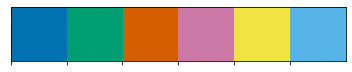

In [41]:
pd.set_option("display.max_columns", 500) # out으로 출력하는 최대 칼럼 수
plt.style.use("seaborn-colorblind") # 스타일 시트
pal = sns.color_palette() # seaborn에서 팔레트 설정
sns.palplot(pal) # pal에 저장한 팔레트 불러오기

### Read in and format data

In [42]:
parquet_files = glob('./archive/Combined_Flights_*.parquet')

In [43]:
parquet_files

['./archive\\Combined_Flights_2018.parquet',
 './archive\\Combined_Flights_2019.parquet',
 './archive\\Combined_Flights_2020.parquet',
 './archive\\Combined_Flights_2021.parquet']

### Feature selection

In [44]:
column_subset = [
    "FlightDate",
    "Airline",
    "Flight_Number_Marketing_Airline",
    "Origin",
    "Dest",
    "Cancelled",
    "Diverted",
    "CRSDepTime",
    "DepTime",
    "DepDelayMinutes",
    "OriginAirportID",
    "OriginCityName",
    "OriginStateName",
    "DestAirportID",
    "DestCityName",
    "DestStateName",
    "TaxiOut",
    "TaxiIn",
    "CRSArrTime",
    "ArrTime",
    "ArrDelayMinutes",
]

In [45]:
print("number of columns = ", len(column_subset))

number of columns =  21


In [46]:
dfs = []

# dfs에 데이터 저장
for f in parquet_files:
    dfs.append(pd.read_parquet(f, columns = column_subset))

# df에 인덱스로 세팅한 열을 삭제하면서 dfs 저장
df = pd.concat(dfs).reset_index(drop=True)

cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    df[c] = df[c].astype("category") # 선택한 컬럼의 데이터 타입을 "category"로 변경


In [47]:
df.dtypes

FlightDate                         datetime64[ns]
Airline                                  category
Flight_Number_Marketing_Airline             int64
Origin                                   category
Dest                                     category
Cancelled                                    bool
Diverted                                     bool
CRSDepTime                                  int64
DepTime                                   float64
DepDelayMinutes                           float64
OriginAirportID                             int64
OriginCityName                             object
OriginStateName                          category
DestAirportID                               int64
DestCityName                               object
DestStateName                            category
TaxiOut                                   float64
TaxiIn                                    float64
CRSArrTime                                  int64
ArrTime                                   float64


In [48]:
df.head()

,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes
0,2018-01-23,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1157.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,14.0,7.0,1304,1256.0,0.0
1,2018-01-24,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1157.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,13.0,12.0,1304,1258.0,0.0
2,2018-01-25,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1153.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,18.0,11.0,1304,1302.0,0.0
3,2018-01-26,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1150.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,17.0,11.0,1304,1253.0,0.0
4,2018-01-27,Endeavor Air Inc.,3298,ABY,ATL,False,False,1400,1355.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,17.0,11.0,1500,1459.0,0.0


### Understand the DepDelayMinutes Variable

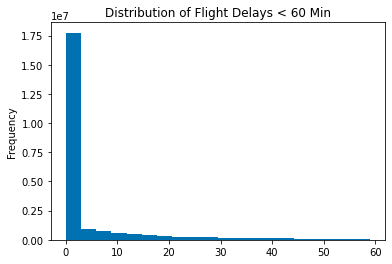

In [49]:
df.query("DepDelayMinutes < 60")["DepDelayMinutes"].plot(
    xlabel = 'time', kind="hist", bins=20,  title="Distribution of Flight Delays(0 ~ 60 Min)"
)
# "hist": 히스토그램, bins: 히스토그램의 가로축 구간의 개수
plt.show()

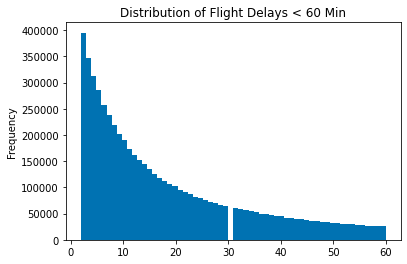

In [52]:
df.query("DepDelayMinutes > 1 and DepDelayMinutes < 61")["DepDelayMinutes"].plot(
    kind="hist", bins=60, title="Distribution of Flight Delays (1 ~ 60 Min)"
)
plt.show()

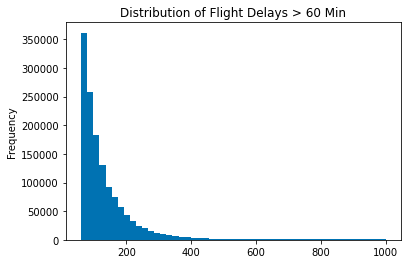

In [57]:
df.query("DepDelayMinutes > 60")["DepDelayMinutes"].plot(
    kind="hist", bins=50, range = [60, 1000], title="Distribution of Flight Delays > 60 Min"
)
plt.show()

### Grouping of Delays and Cancellations
##### On time / Small delay(0-15) / Medium delay(15-45) / Large delay(>60) / Cancelled

In [77]:
df["DelayGroup"] = None

# df.loc: 행 또는 열의 데이터 조회 및 값 설정
df.loc[df["DepDelayMinutes"] == 0, "DelayGroup"] = "OnTime_Early"
df.loc[(df["DepDelayMinutes"] > 0) & (df["DepDelayMinutes"] <= 15), "DelayGroup"] = "Small_Delay"
df.loc[(df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"] = "Medium_Delay"
df.loc[df["DepDelayMinutes"] > 60, "DelayGroup"] = "Large_Delay"
df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled"

In [59]:
df.head()

,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup
0,2018-01-23,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1157.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,14.0,7.0,1304,1256.0,0.0,OnTime_Early
1,2018-01-24,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1157.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,13.0,12.0,1304,1258.0,0.0,OnTime_Early
2,2018-01-25,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1153.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,18.0,11.0,1304,1302.0,0.0,OnTime_Early
3,2018-01-26,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1150.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,17.0,11.0,1304,1253.0,0.0,OnTime_Early
4,2018-01-27,Endeavor Air Inc.,3298,ABY,ATL,False,False,1400,1355.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,17.0,11.0,1500,1459.0,0.0,OnTime_Early


#### delay group value count

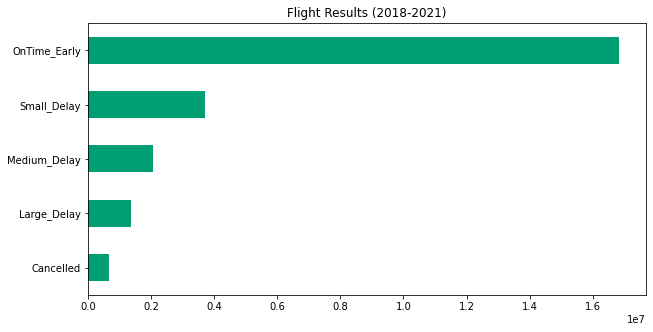

In [78]:
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), color=pal[1], title="Flight Results (2018-2021)"
)
plt.show()

### Number of scheduled flights per year

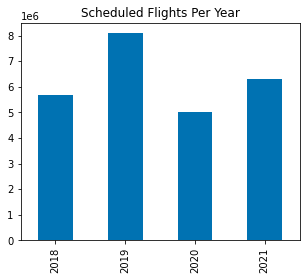

In [79]:
df["Year"] = df['FlightDate'].dt.year # Year 컬럼 생성
df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(5, 4), title="Scheduled Flights Per Year"
)
plt.show()

### Ratio of flights result by year

In [81]:
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]


In [82]:
df_agg[col_order]

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,65.498929,16.830027,9.744243,6.339716,1.587084
2019,65.997377,16.051834,9.275188,6.736522,1.939079
2020,76.777245,9.745438,4.615904,2.810025,6.051388
2021,66.971616,16.458264,9.090740,5.686410,1.792970
